# Linear Regression and Regularization in Linear models

### Reading:

1. GoodFellow. Deep Learning. p 245-252, 261-268
2. Bishop. Pattern Recognition and Machine Learning p 140-146

## Outline

1. General Form, Polynomial Regression
1. Analytic Solution
1. SGD
1. Pytorch and computational graphs
1. L2 regularization as a prior on weights
1. L2 regularization as stabilization of matrix inverse
1. Equivance between L2 and early stopping
1. L1 regularization and sparsity
1. ElasticNet, L_p norms, structured sparsity

Regularization
<img src="images/reg.png" style="height:300px">

Computational Graph
<img src="images/graph.png" style="height:300px">

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import torch as tt
from torch import nn
from sklearn.datasets import make_regression
from sklearn.preprocessing import scale

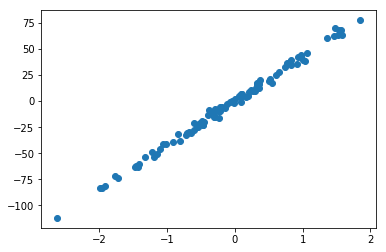

In [4]:
# create dataset
X, Y = make_regression(100, n_features=1, n_informative=1, noise=3, random_state=42)
plt.scatter(X, Y)

In [27]:
# convert numpy array to pytorch tensor.
# dtype dose matter!

X = tt.tensor(X, dtype=tt.float32)
Y = tt.tensor(Y.reshape(-1,1), dtype=tt.float32)

In [32]:
# all neural nets should be descendant of nn.Module 

class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim):

        super(LinearRegressionModel, self).__init__() 
        
        # weight initialization
        w_init = np.random.randn(input_dim, 1)
        b_init = np.random.randn(1)
        
        # trainable parameters
        self.W = tt.tensor(w_init, dtype=tt.float32, requires_grad=True)
        self.b = tt.tensor(b_init, dtype=tt.float32, requires_grad=True)

    # forward pass
    def forward(self, x):
        # Here the forward pass is simply a linear function

        out = tt.mm(X, self.W) + self.b
        return out
    
    # list of trainable parameters
    def parameters(self):
        return [self.W, self.b]

/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:42: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


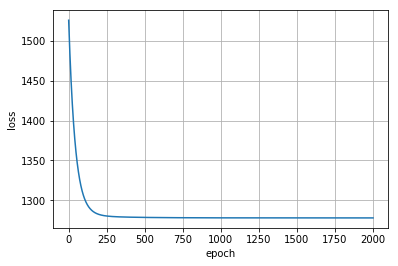

In [33]:
# feature dimension
input_dim = X.shape[1]
model = LinearRegressionModel(input_dim)

# train routine
def train(model, X, Y, learning_rate, epochs, alpha=1):
    """
    X - feature matrix, tensor
    Y - target values, tensor
    learning_rate - step size for SGD
    epochs - number of full passes over dataset
    alphha - regularization parameter
    """
    criterion = tt.nn.MSELoss()
    optimizer = tt.optim.SGD(model.parameters(), lr = learning_rate)
    
    # training history
    history = []
    for epoch in range(epochs):

        epoch +=1

        # gradients should be cleared before  every iteration
        optimizer.zero_grad()
        
        #forward to get predicted values
        outputs = model.forward(X)
        
        # loss
#         loss = criterion(outputs, Y)
        
        # L2 regularization
        loss = criterion(outputs, Y)+ alpha/2 * tt.norm(model.W)**2
        
        # backward  propagation
        loss.backward()# back props
        
        # step in the direction of the antigradient and update parameters
        optimizer.step()
        
        # logging
        history.append((epoch,loss.data[0].detach()))
        
    return history


history = train(model, X, Y, 0.001, epochs=2000, alpha=10)
xx = list(map(lambda x: x[0], history))
yy = list(map(lambda x: x[1], history))
plt.plot(xx, yy)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

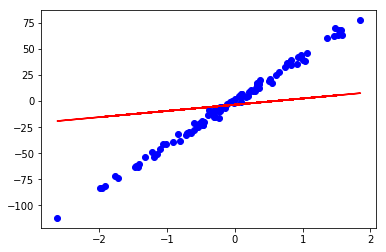

In [34]:
# plot result

ww = model.W[0,0].detach().numpy()
bb = model.b[0].detach().numpy()
ww, bb

xx = X.numpy()
yy = Y.numpy()
plt.scatter(xx, yy, color='b')
plt.plot(xx, ww*xx + bb, color='r')